# Forecasting with Facebook Prophet


In [222]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [223]:
results_active_cases = pd.DataFrame(columns=["Country", "Model", "MAE", "RMSE", "RRSE", "MAPE"])
results_active_cases

,Country,Model,MAE,RMSE,RRSE,MAPE


In [208]:
df = pd.read_csv("data/data20_q1/in_active_cases.csv")
df.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      850 non-null    object
 1   y       850 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.4+ KB


In [210]:
df["ds"] = pd.to_datetime(df["ds"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      850 non-null    datetime64[ns]
 1   y       850 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.4 KB


In [211]:
period = (df['ds'] >= "2020-02-01") & (df['ds'] <= "2020-05-20")
df = df.loc[period]

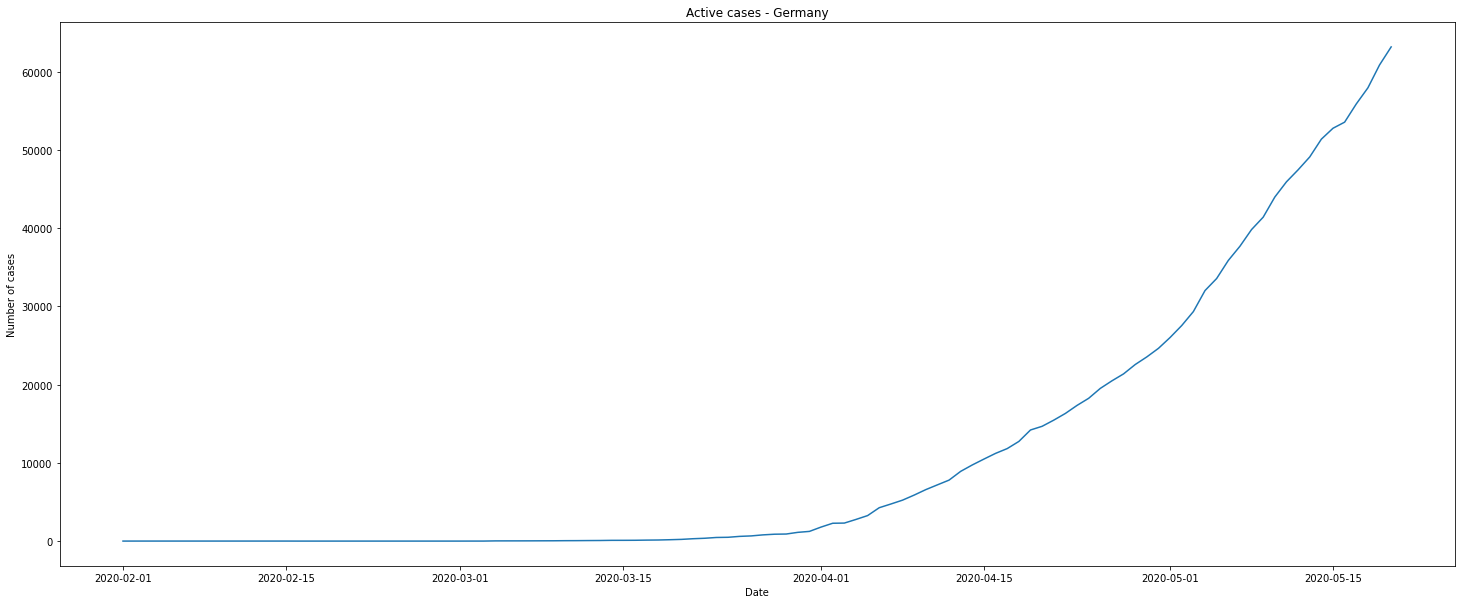

In [212]:
plt.figure(figsize=(25, 10))
plt.plot(df.groupby("ds")[["y"]].sum())
plt.title("Active cases - Germany")
plt.xlabel("Date")
plt.ylabel("Number of cases")
plt.show()

### Fit FBProphet Model

In [213]:
split_date = "2020-05-01"
train = df.loc[df["ds"] < split_date]
test = df.loc[df["ds"] >= split_date]
print("Train size = %d, test size = %d" % (len(train), len(test)))

Train size = 90, test size = 20


In [214]:
model = Prophet()
model.add_country_holidays(country_name="India")
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -126.185
Iteration  1. Log joint probability =    56.0632. Improved by 182.248.
Iteration  2. Log joint probability =    98.1278. Improved by 42.0646.
Iteration  3. Log joint probability =    104.758. Improved by 6.62991.
Iteration  4. Log joint probability =    113.883. Improved by 9.12546.
Iteration  5. Log joint probability =    113.956. Improved by 0.073067.
Iteration  6. Log joint probability =    113.959. Improved by 0.00237782.
Iteration  7. Log joint probability =    114.028. Improved by 0.0694737.
Iteration  8. Log joint probability =    114.056. Improved by 0.0280569.
Iteration  9. Log joint probability =     114.17. Improved by 0.113447.
Iteration 10. Log joint probability =     114.24. Improved by 0.0707977.
Iteration 11. Log joint probability =    114.404. Improved by 0.16359.
Iteration 12. Log joint probability =    114.414. Improved by 0.00979507.
Iteration 13. Log joint probability =    114.529. Improved by 0.115131.
Iteration 14. Log jo

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


0.0347132.
Iteration 15. Log joint probability =    114.588. Improved by 0.0244341.
Iteration 16. Log joint probability =    114.727. Improved by 0.138659.
Iteration 17. Log joint probability =    114.744. Improved by 0.0173189.
Iteration 18. Log joint probability =    114.753. Improved by 0.00865887.
Iteration 19. Log joint probability =    114.999. Improved by 0.246276.
Iteration 20. Log joint probability =    115.015. Improved by 0.0156872.
Iteration 21. Log joint probability =    115.249. Improved by 0.234201.
Iteration 22. Log joint probability =    115.303. Improved by 0.0538924.
Iteration 23. Log joint probability =    115.761. Improved by 0.458016.
Iteration 24. Log joint probability =    115.855. Improved by 0.0940243.
Iteration 25. Log joint probability =    116.076. Improved by 0.221749.
Iteration 26. Log joint probability =    116.188. Improved by 0.111142.
Iteration 27. Log joint probability =    116.202. Improved by 0.0139084.
Iteration 28. Log joint probability =    142.

In [215]:
forecast = model.predict(test)

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

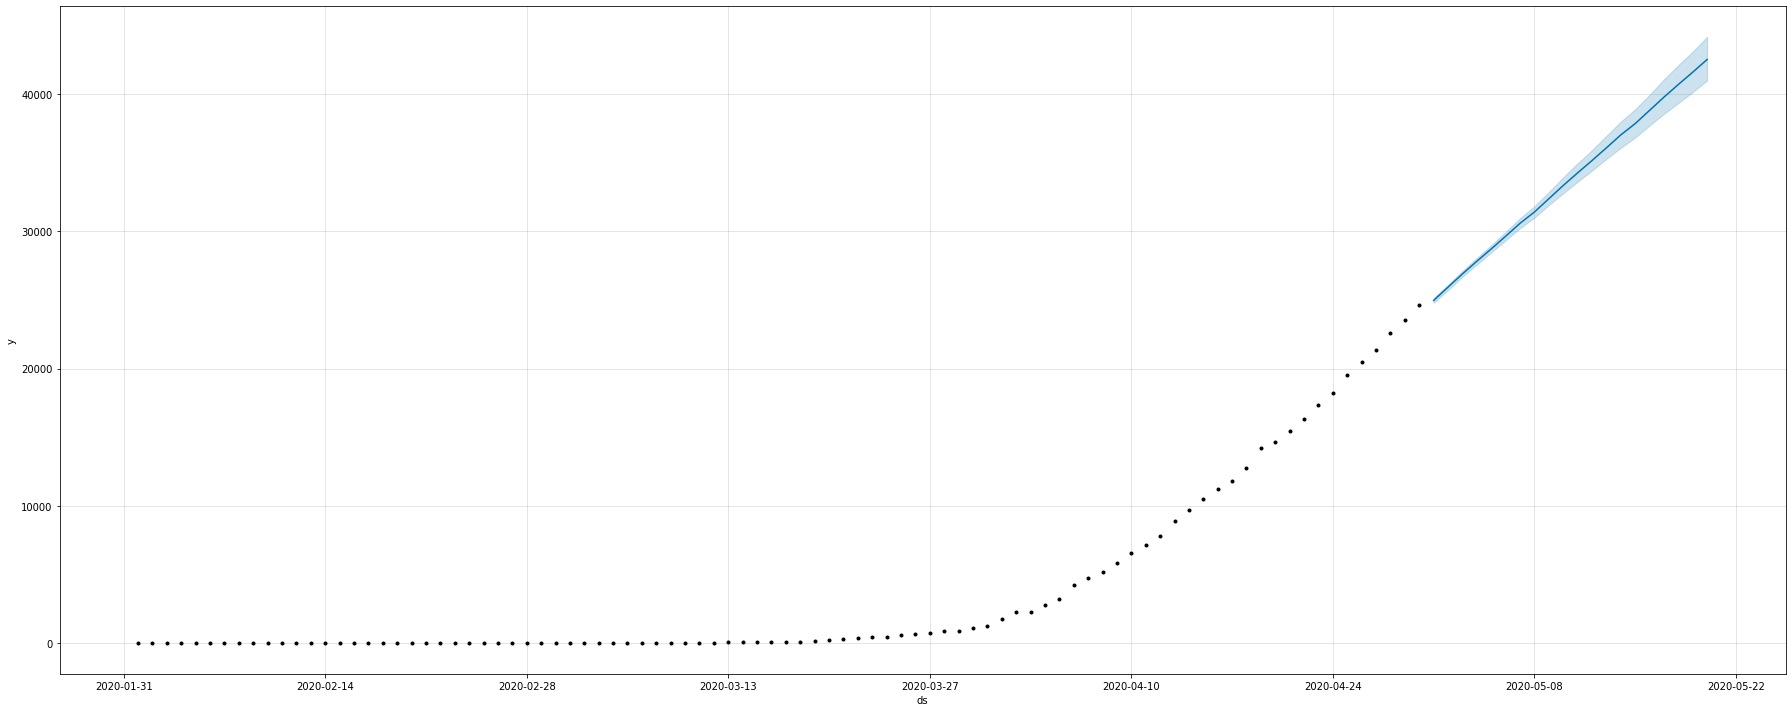

In [216]:
model.plot(forecast, figsize=(25, 10));

In [217]:
""" Root Relative Squared Error """
# Doesn't work!?
def rrse(y_true, y_pred):
    return math.sqrt(np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

In [218]:
MAE = mean_absolute_error(y_true=test["y"], y_pred=forecast["yhat"])
RMSE = math.sqrt(mean_squared_error(y_true=test["y"], y_pred=forecast["yhat"]))
RRSE = rrse(y_true=test["y"], y_pred=forecast["yhat"])
MAPE = mean_absolute_percentage_error(y_true=test["y"], y_pred=forecast["yhat"]) * 100

print("MAE:", MAE)
print("RMSE:", RMSE)
print("RRSE:", RRSE)
print("MAPE", MAPE, "%")

MAE: 10500.859183797096
RMSE: 11973.359649213098
RRSE: 0.0
MAPE 21.70106355273964 %


# Forecasting for different types of cases for each country

In [224]:
def fbprophet_forecasting(country, country_code, data_type, start_date, end_date, split_date, results_table):
    df = pd.read_csv("data/data20_q1/" + country_code + "_" + data_type + ".csv")
    df["ds"] = pd.to_datetime(df["ds"])
    # print(df.info())

    period = (df['ds'] >= start_date) & (df['ds'] <= end_date)
    df = df.loc[period]

    plt.figure(figsize=(25, 10))
    plt.plot(df.groupby("ds")[["y"]].sum())
    plt.title(country + " - " + data_type.split("_")[0] + " cases")
    plt.xlabel("Date")
    plt.ylabel("Number of cases")
    plt.savefig("/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/data/images/" + country.lower() + "_" + data_type + ".png")
    # print(plt.show())

    # Fit Prophet model
    train = df.loc[df["ds"] < split_date]
    test = df.loc[df["ds"] >= split_date]
    # print("Train size = %d, test size = %d" % (len(train), len(test)))

    model = Prophet()
    if (country == "United States"):
        ;
    else:
        model.add_country_holidays(country_name=country)
    model.fit(train)
    forecast = model.predict(test)
    fig = model.plot(forecast, figsize=(25, 10))
    fig.savefig("/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/data/images/" + country.lower() + "_" + data_type + "_forecast.png")
    # print(fig)

    MAE = mean_absolute_error(y_true=test["y"], y_pred=forecast["yhat"])
    RMSE = math.sqrt(mean_squared_error(y_true=test["y"], y_pred=forecast["yhat"]))
    RRSE = rrse(y_true=test["y"], y_pred=forecast["yhat"])
    MAPE = mean_absolute_percentage_error(y_true=test["y"], y_pred=forecast["yhat"]) * 100
    # print(country.upper() + " | " + data_type)
    # print("MAE:", MAE)
    # print("RMSE:", RMSE)
    # print("RRSE:", RRSE)
    # print("MAPE", MAPE, "%")

    res = pd.DataFrame({"Country" : country, "Model"  : "Facebook Prophet", "MAE"  : MAE, "RMSE" : RMSE, "RRSE" : RRSE, "MAPE" : MAPE}, index=[len(results_table)])
    results_table = pd.concat([results_table, res])
    return results_table

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -61.4349
Iteration  1. Log joint probability =    51.3225. Improved by 112.757.
Iteration  2. Log joint probability =    83.2194. Improved by 31.8969.
Iteration  3. Log joint probability =     104.29. Improved by 21.0711.
Iteration  4. Log joint probability =    104.391. Improved by 0.100105.
Iteration  5. Log joint probability =    104.402. Improved by 0.0112506.
Iteration  6. Log joint probability =    104.436. Improved by 0.0342868.
Iteration  7. Log joint probability =    107.114. Improved by 2.67779.
Iteration  8. Log joint probability =    107.198. Improved by 0.0840797.
Iteration  9. Log joint probability =     107.26. Improved by 0.0622097.
Iteration 10. Log joint probability =    107.461. Improved by 0.200529.
Iteration 11. Log joint probability =    107.552. Improved by 0.0911471.
Iteration 12. Log joint probability =     107.79. Improved by 0.238556.
Iteration 13. Log joint probability =     107.85. Improved by 0.0596392.
Iteration 14. Log jo

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is depre


Initial log joint probability = -84.4533
Iteration  1. Log joint probability =    66.6043. Improved by 151.058.
Iteration  2. Log joint probability =    77.8002. Improved by 11.1959.
Iteration  3. Log joint probability =    92.9682. Improved by 15.1679.
Iteration  4. Log joint probability =    93.0871. Improved by 0.118953.
Iteration  5. Log joint probability =    93.4695. Improved by 0.382405.
Iteration  6. Log joint probability =    93.4966. Improved by 0.0270864.
Iteration  7. Log joint probability =    93.6305. Improved by 0.133906.
Iteration  8. Log joint probability =    94.0431. Improved by 0.412631.
Iteration  9. Log joint probability =    94.1605. Improved by 0.11739.
Iteration 10. Log joint probability =    94.4624. Improved by 0.301917.
Iteration 11. Log joint probability =     95.011. Improved by 0.548607.
Iteration 12. Log joint probability =    95.0434. Improved by 0.0323183.
Iteration 13. Log joint probability =    95.6101. Improved by 0.566773.
Iteration 14. Log joint 

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is depre


Initial log joint probability = -88.1349
Iteration  1. Log joint probability =    71.9632. Improved by 160.098.
Iteration  2. Log joint probability =    127.674. Improved by 55.7107.
Iteration  3. Log joint probability =    127.694. Improved by 0.0200794.
Iteration  4. Log joint probability =    127.742. Improved by 0.0485742.
Iteration  5. Log joint probability =    132.235. Improved by 4.4927.
Iteration  6. Log joint probability =    132.283. Improved by 0.0481347.
Iteration  7. Log joint probability =    132.284. Improved by 0.000719465.
Iteration  8. Log joint probability =    132.294. Improved by 0.0100941.
Iteration  9. Log joint probability =    132.367. Improved by 0.073072.
Iteration 10. Log joint probability =    132.404. Improved by 0.0365028.
Iteration 11. Log joint probability =    132.467. Improved by 0.0628223.
Iteration 12. Log joint probability =    132.482. Improved by 0.0157137.
Iteration 13. Log joint probability =    132.626. Improved by 0.143797.
Iteration 14. Lo

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is depre


Initial log joint probability = -94.1303
Iteration  1. Log joint probability =     56.331. Improved by 150.461.
Iteration  2. Log joint probability =    95.0828. Improved by 38.7518.
Iteration  3. Log joint probability =    102.818. Improved by 7.73539.
Iteration  4. Log joint probability =    104.004. Improved by 1.18543.
Iteration  5. Log joint probability =    104.047. Improved by 0.0437251.
Iteration  6. Log joint probability =    104.106. Improved by 0.0582143.
Iteration  7. Log joint probability =    104.111. Improved by 0.00561575.
Iteration  8. Log joint probability =    104.155. Improved by 0.0437008.
Iteration  9. Log joint probability =    104.166. Improved by 0.0114156.
Iteration 10. Log joint probability =    104.385. Improved by 0.218229.
Iteration 11. Log joint probability =    104.413. Improved by 0.0282751.
Iteration 12. Log joint probability =    104.957. Improved by 0.54466.
Iteration 13. Log joint probability =    105.037. Improved by 0.0800012.
Iteration 14. Log j

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is depre


Initial log joint probability = -83.8931
Iteration  1. Log joint probability =    57.6167. Improved by 141.51.
Iteration  2. Log joint probability =    87.4737. Improved by 29.857.
Iteration  3. Log joint probability =     103.08. Improved by 15.6066.
Iteration  4. Log joint probability =    106.466. Improved by 3.38575.
Iteration  5. Log joint probability =    106.818. Improved by 0.352107.
Iteration  6. Log joint probability =    106.945. Improved by 0.126595.
Iteration  7. Log joint probability =    107.017. Improved by 0.0727141.
Iteration  8. Log joint probability =    107.065. Improved by 0.0471875.
Iteration  9. Log joint probability =    107.099. Improved by 0.0348234.
Iteration 10. Log joint probability =    107.113. Improved by 0.0135451.
Iteration 11. Log joint probability =    107.176. Improved by 0.0634129.
Iteration 12. Log joint probability =    107.177. Improved by 0.000720924.
Iteration 13. Log joint probability =    107.215. Improved by 0.0378886.
Iteration 14. Log j

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is depre


Initial log joint probability = -88.118
Iteration  1. Log joint probability =     37.602. Improved by 125.72.
Iteration  2. Log joint probability =    86.2774. Improved by 48.6754.
Iteration  3. Log joint probability =    104.976. Improved by 18.6984.
Iteration  4. Log joint probability =    106.214. Improved by 1.23834.
Iteration  5. Log joint probability =    106.239. Improved by 0.024859.
Iteration  6. Log joint probability =    106.283. Improved by 0.0444187.
Iteration  7. Log joint probability =    106.301. Improved by 0.0179745.
Iteration  8. Log joint probability =    106.306. Improved by 0.00449751.
Iteration  9. Log joint probability =    106.339. Improved by 0.0326581.
Iteration 10. Log joint probability =    106.347. Improved by 0.00818137.
Iteration 11. Log joint probability =    106.379. Improved by 0.0327469.
Iteration 12. Log joint probability =    106.409. Improved by 0.0294355.
Iteration 13. Log joint probability =    106.424. Improved by 0.0147823.
Iteration 14. Log 

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is depre


Initial log joint probability = -50.5611
Iteration  1. Log joint probability =    10.7608. Improved by 61.3219.
Iteration  2. Log joint probability =    66.4562. Improved by 55.6954.
Iteration  3. Log joint probability =    66.5113. Improved by 0.0551295.
Iteration  4. Log joint probability =     66.525. Improved by 0.0136848.
Iteration  5. Log joint probability =    66.5844. Improved by 0.0593799.
Iteration  6. Log joint probability =    66.6102. Improved by 0.0258061.
Iteration  7. Log joint probability =    66.6777. Improved by 0.0675208.
Iteration  8. Log joint probability =    66.8019. Improved by 0.124179.
Iteration  9. Log joint probability =    66.9799. Improved by 0.178004.
Iteration 10. Log joint probability =    67.1487. Improved by 0.168843.
Iteration 11. Log joint probability =    67.2957. Improved by 0.146982.
Iteration 12. Log joint probability =    69.5227. Improved by 2.22702.
Iteration 13. Log joint probability =    70.3211. Improved by 0.798406.
Iteration 14. Log jo

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/hdays.py:259: Warning: We only support Diwali and Holi holidays fr


Initial log joint probability = -122.986
Iteration  1. Log joint probability =    55.9923. Improved by 178.978.
Iteration  2. Log joint probability =      92.98. Improved by 36.9876.
Iteration  3. Log joint probability =     111.13. Improved by 18.1503.
Iteration  4. Log joint probability =     112.46. Improved by 1.3294.
Iteration  5. Log joint probability =    112.464. Improved by 0.00433693.
Iteration  6. Log joint probability =    112.474. Improved by 0.0104475.
Iteration  7. Log joint probability =    138.272. Improved by 25.7978.
Iteration  8. Log joint probability =    138.392. Improved by 0.119347.
Iteration  9. Log joint probability =    138.415. Improved by 0.0234556.
Iteration 10. Log joint probability =    138.607. Improved by 0.192301.
Iteration 11. Log joint probability =    138.655. Improved by 0.0479883.
Iteration 12. Log joint probability =    139.041. Improved by 0.385673.
Iteration 13. Log joint probability =      139.1. Improved by 0.0584707.
Iteration 14. Log join

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

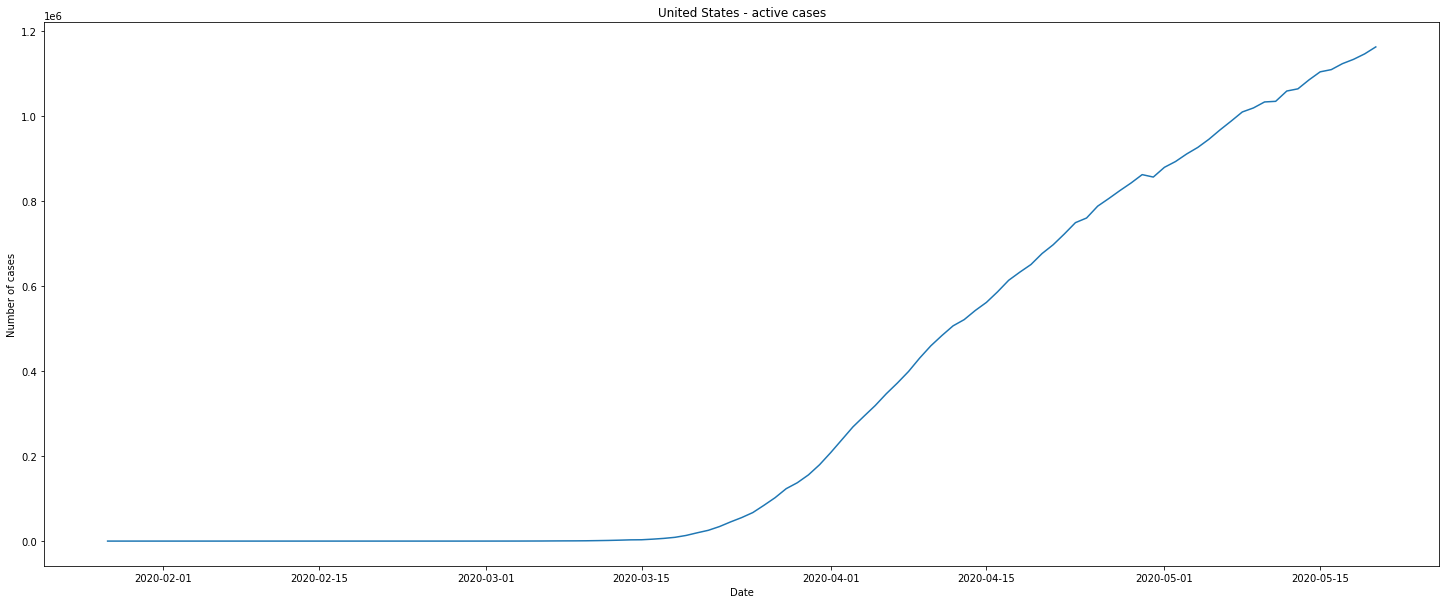

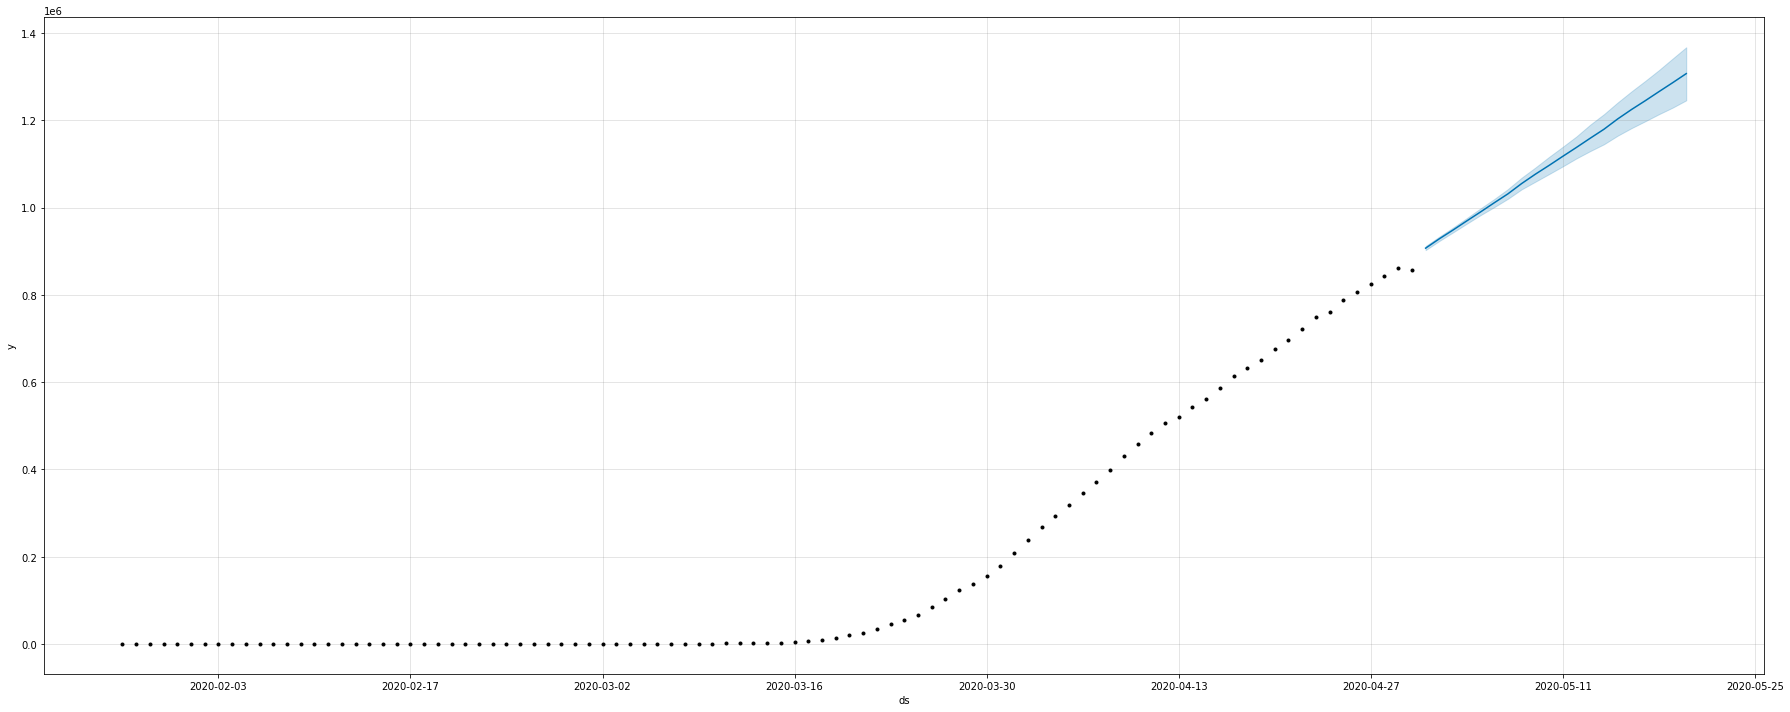

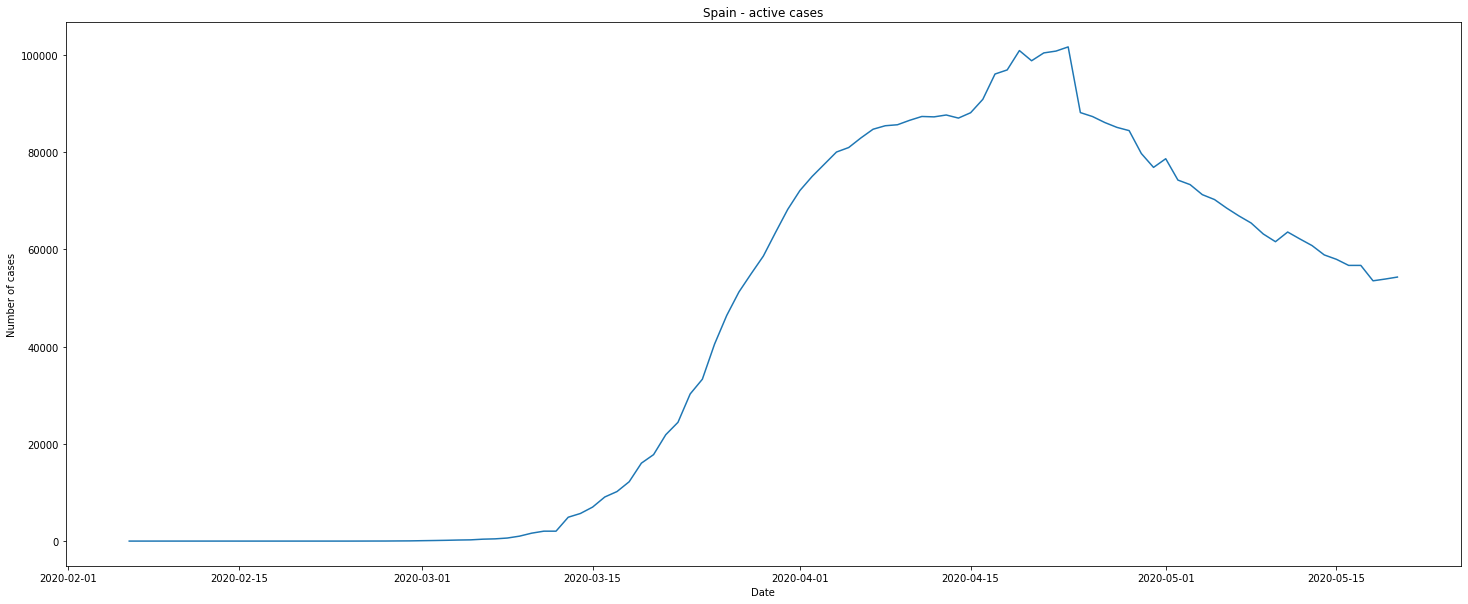

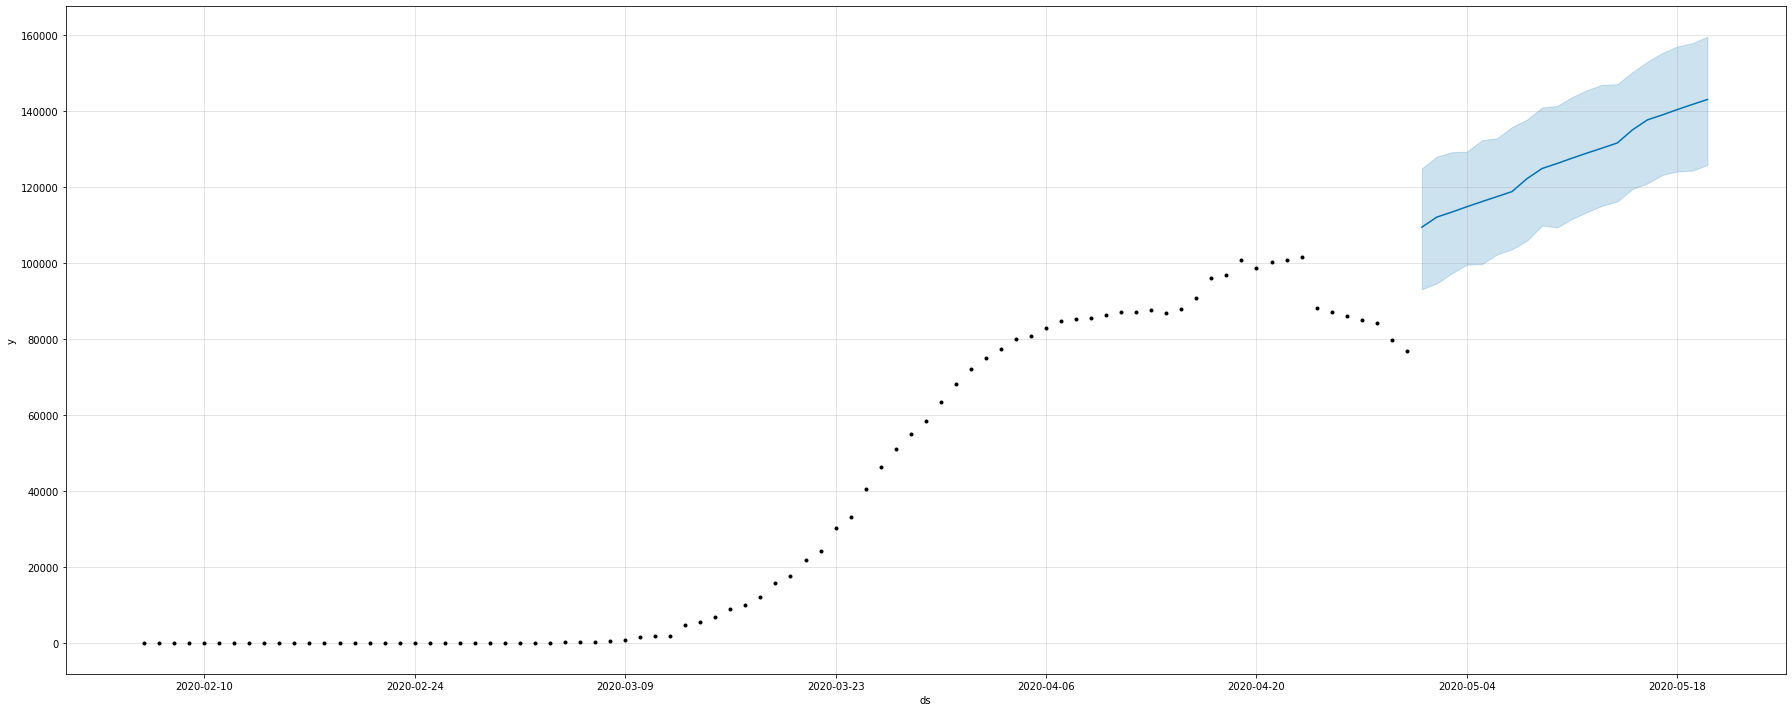

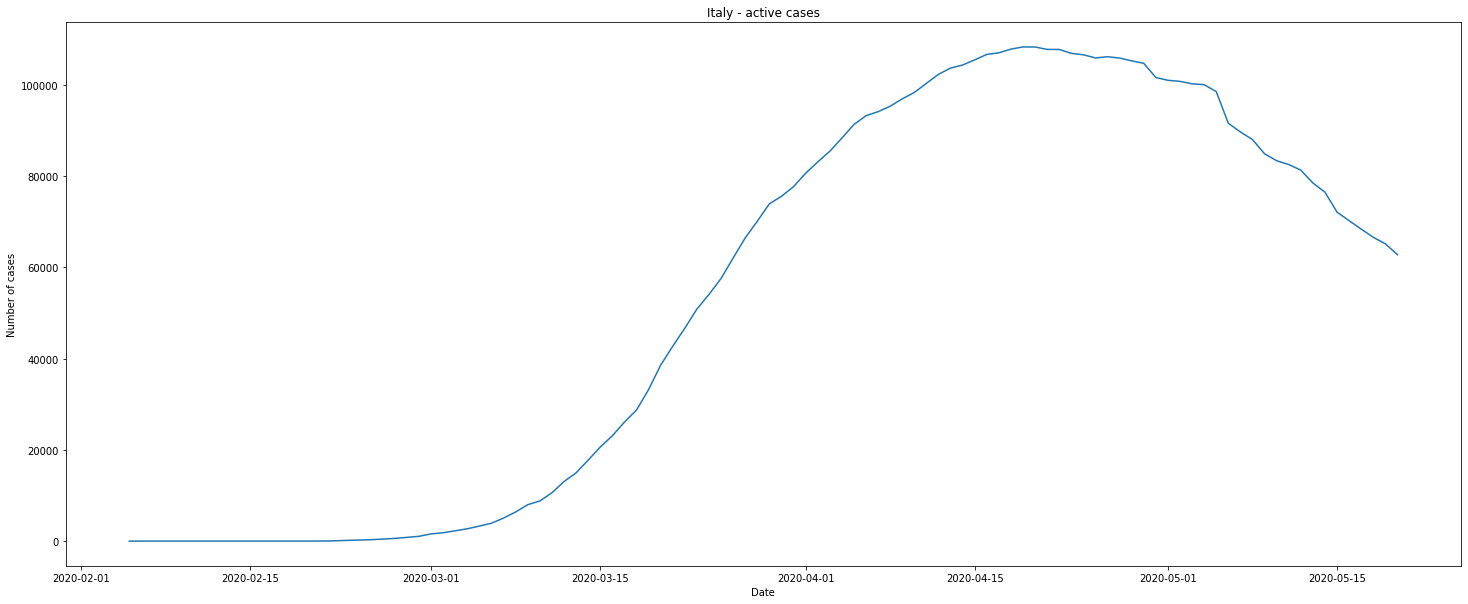

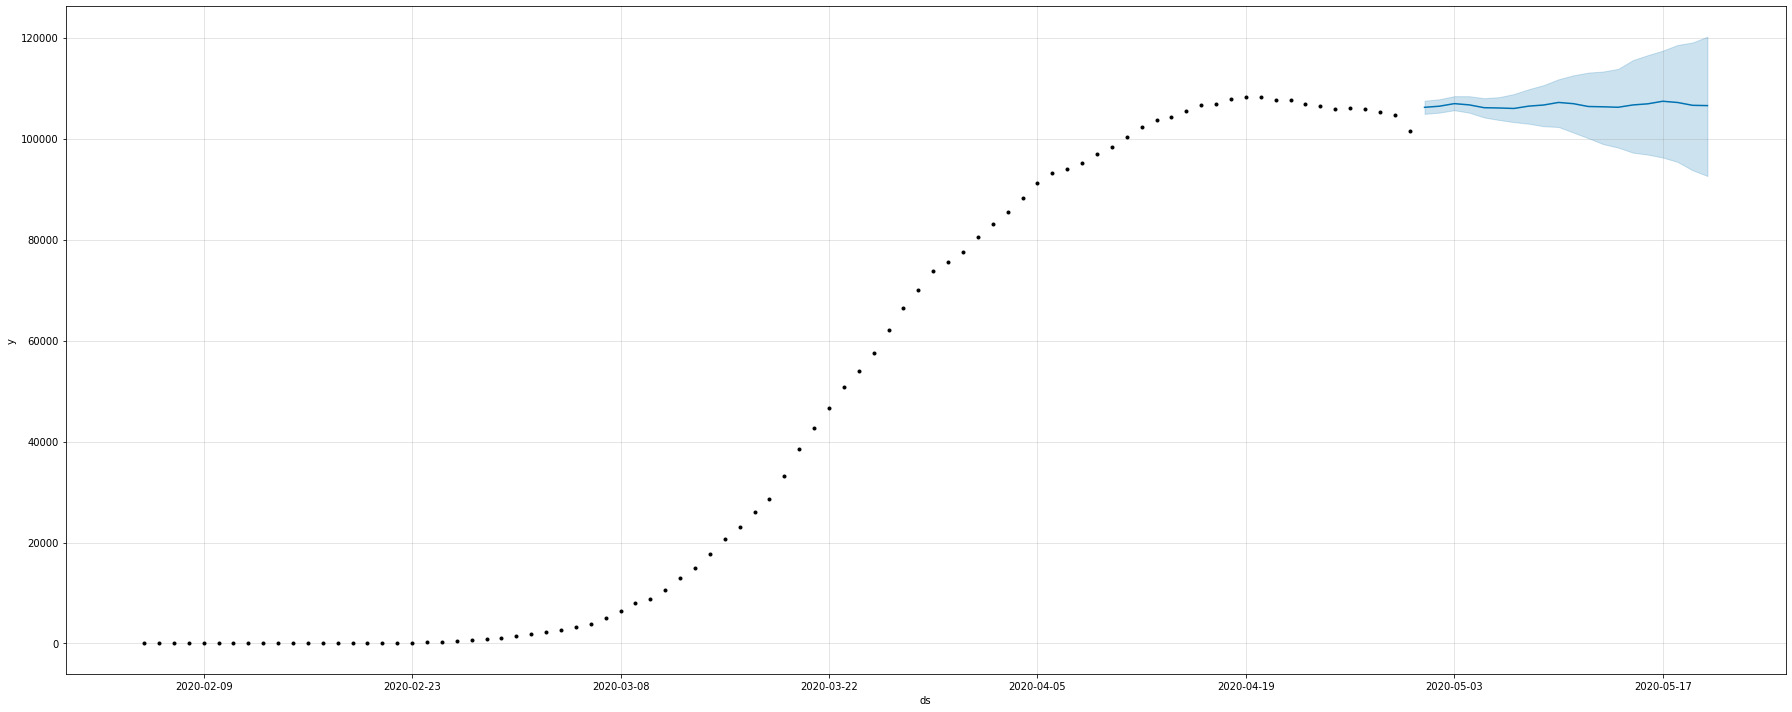

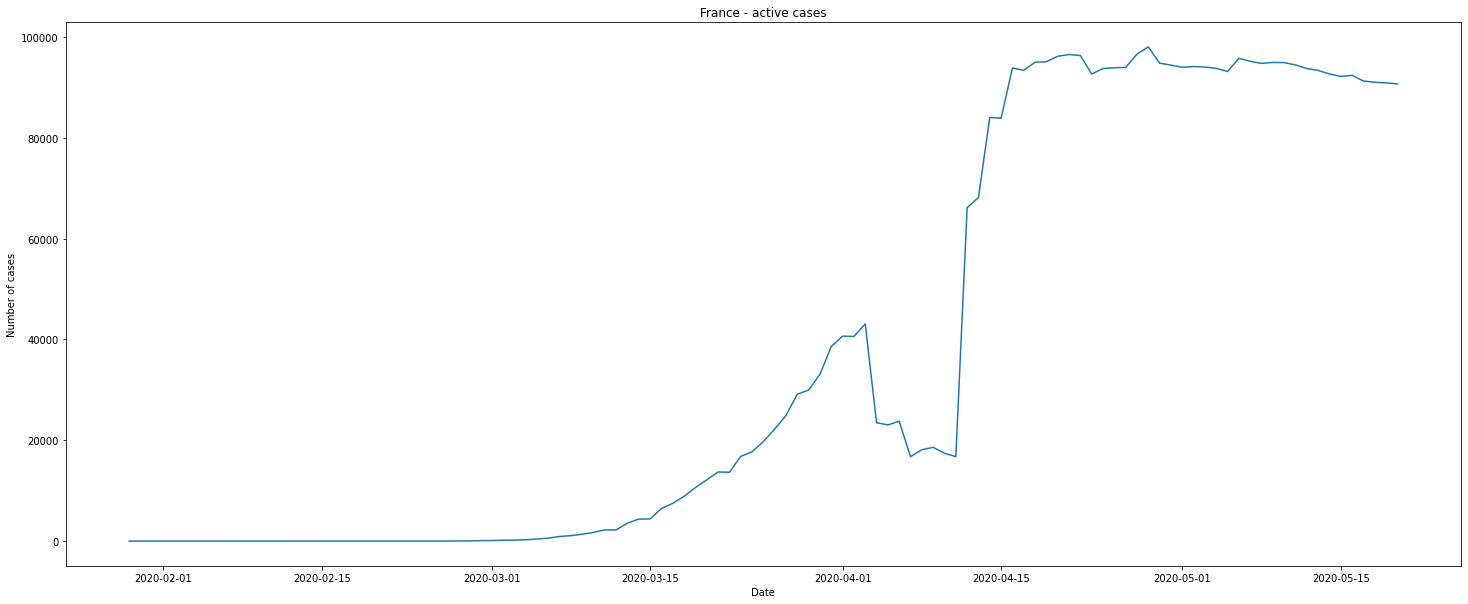

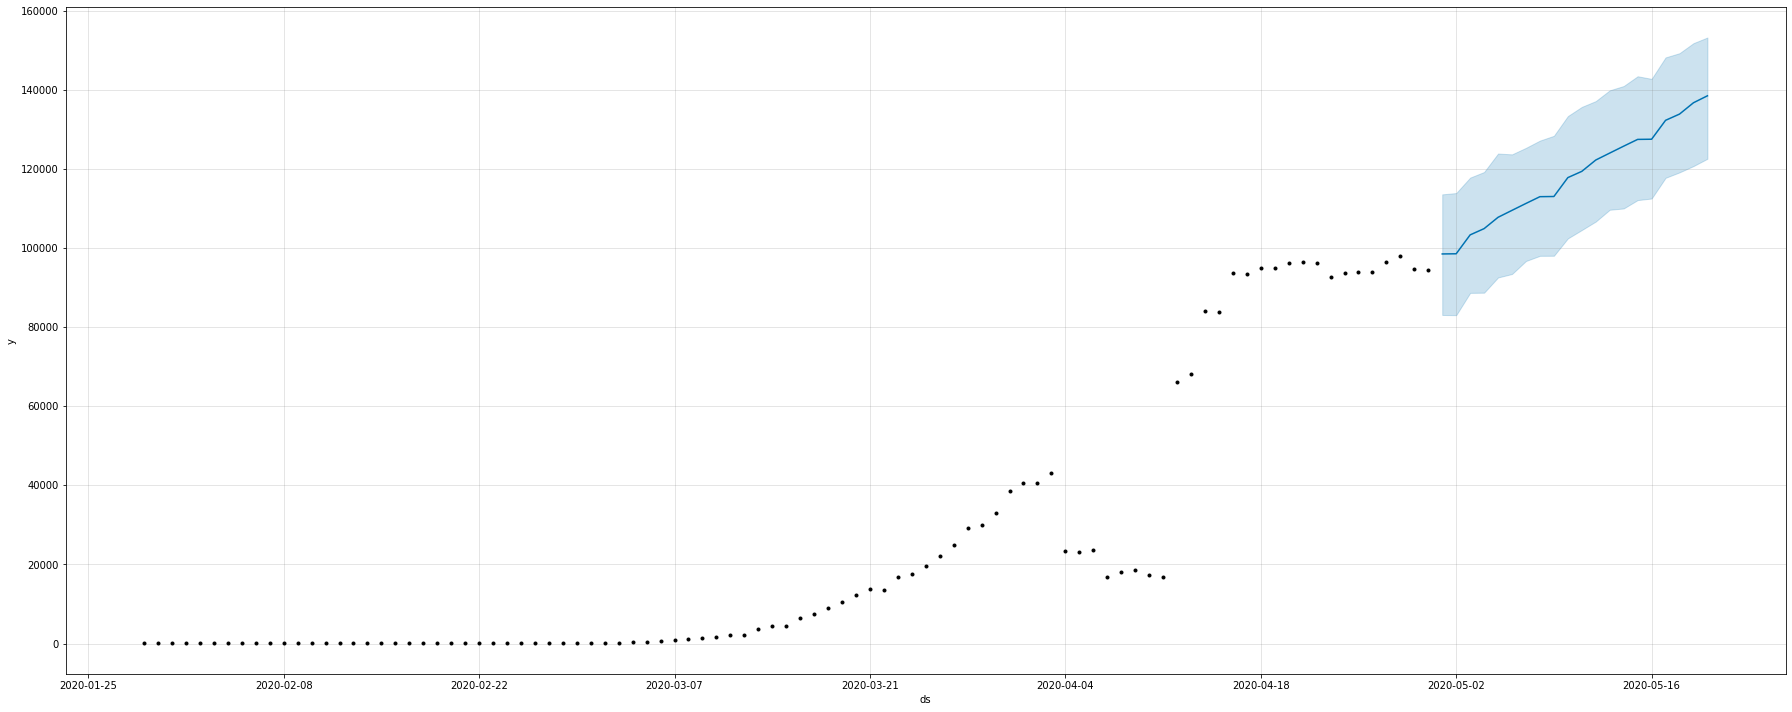

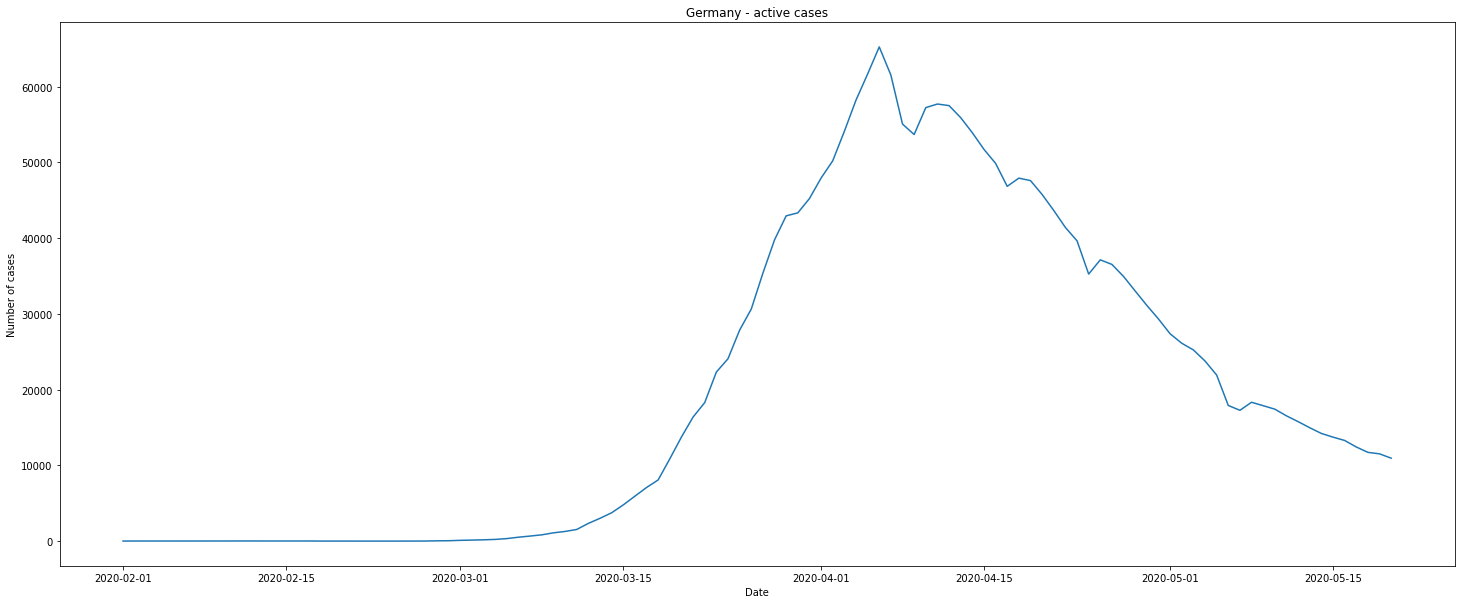

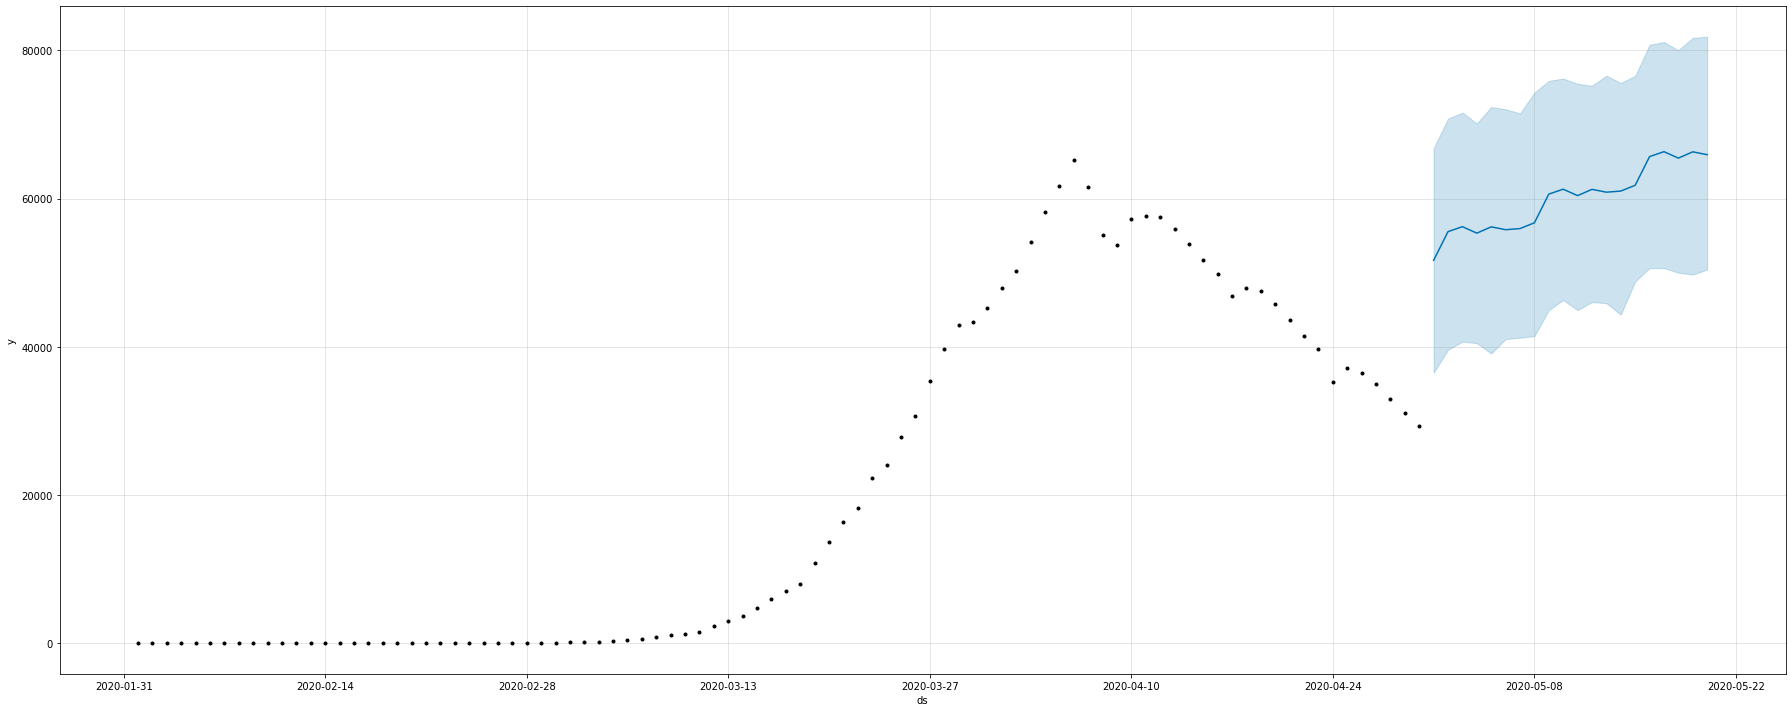

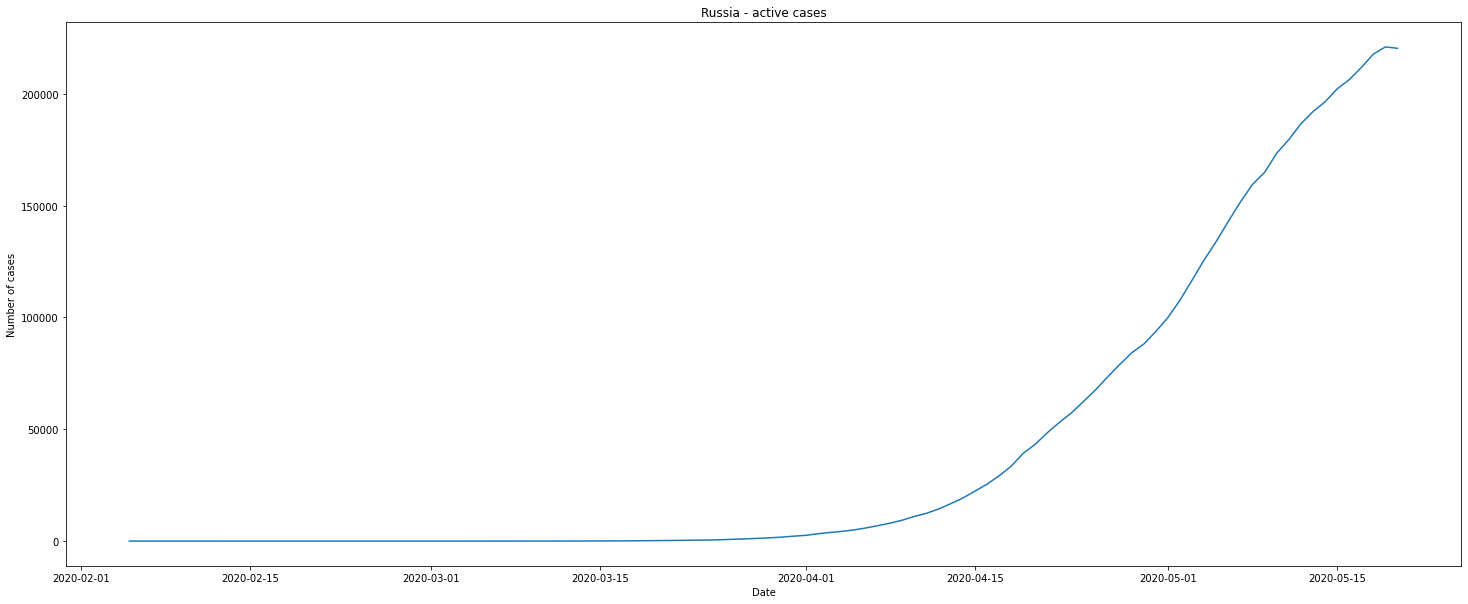

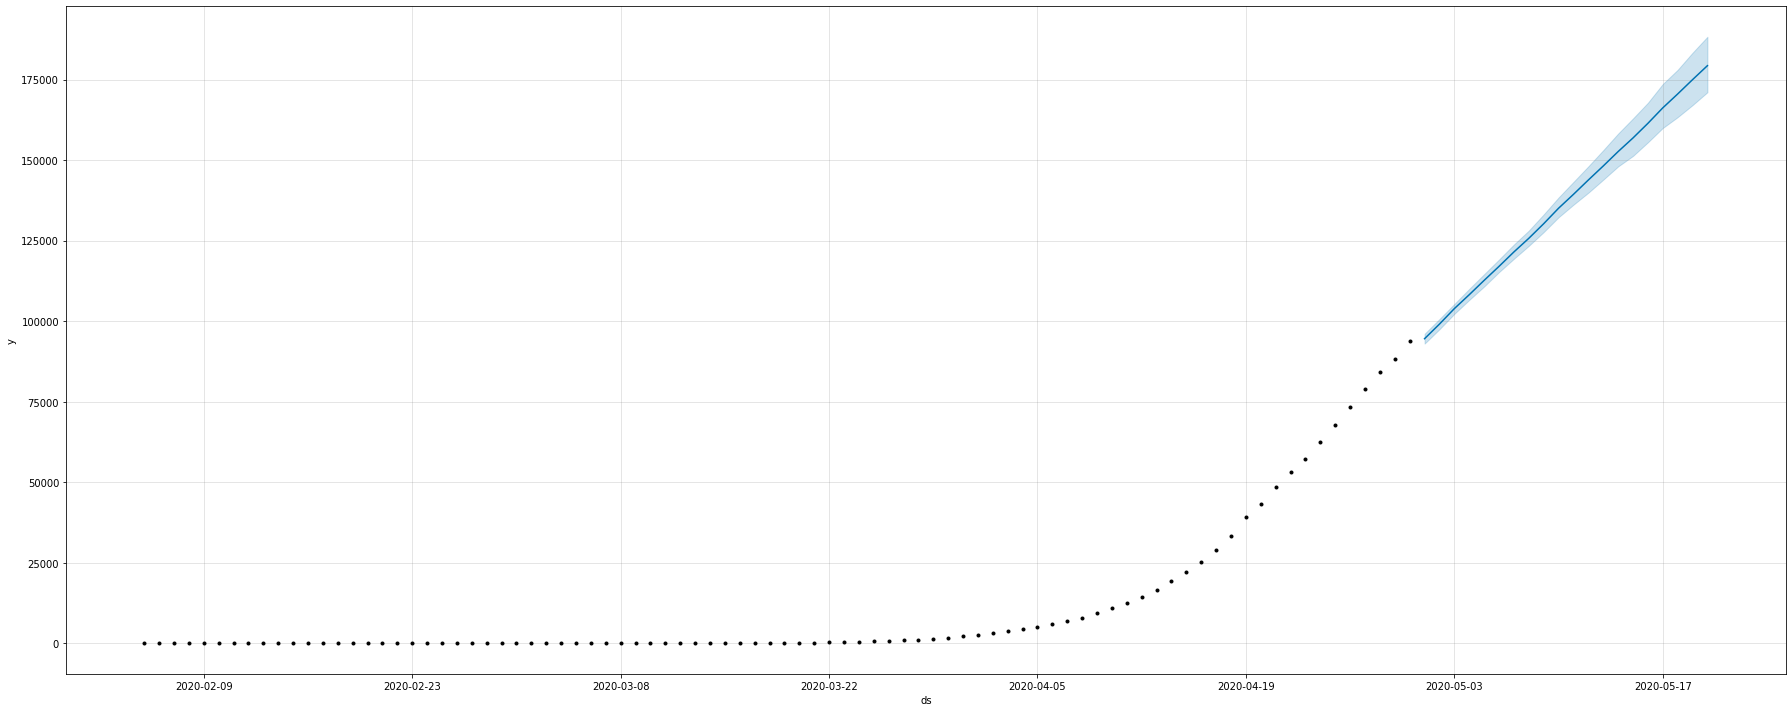

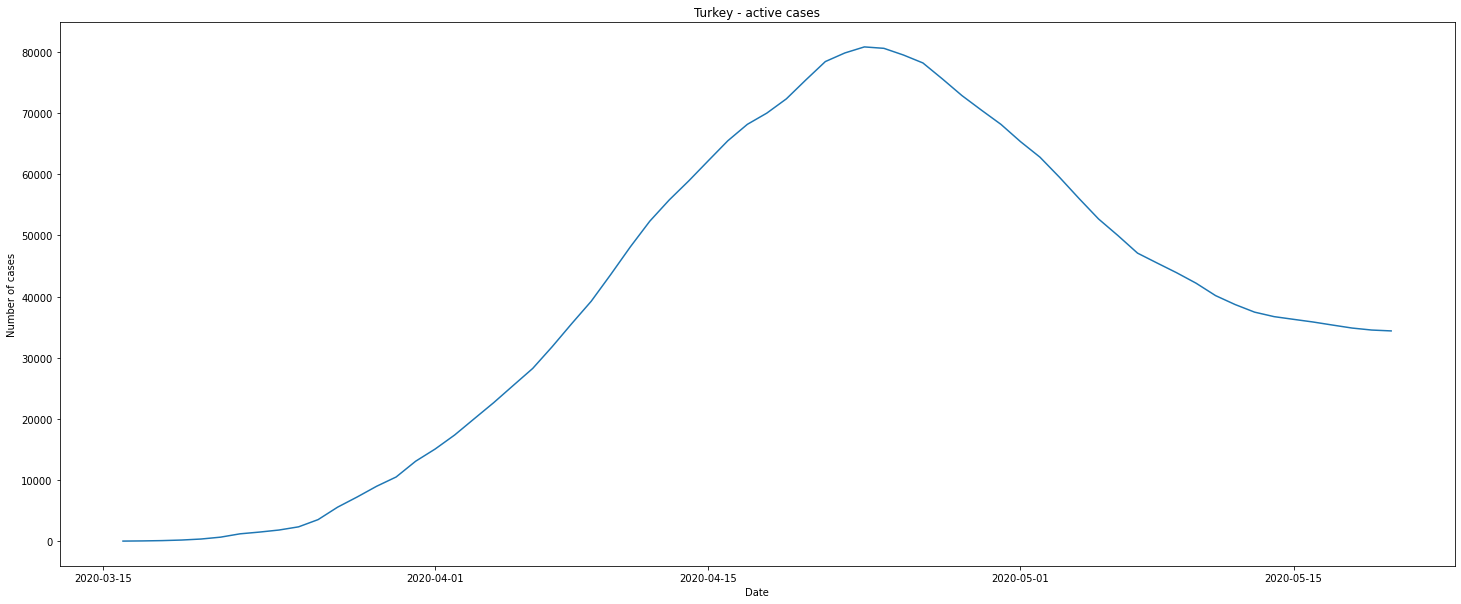

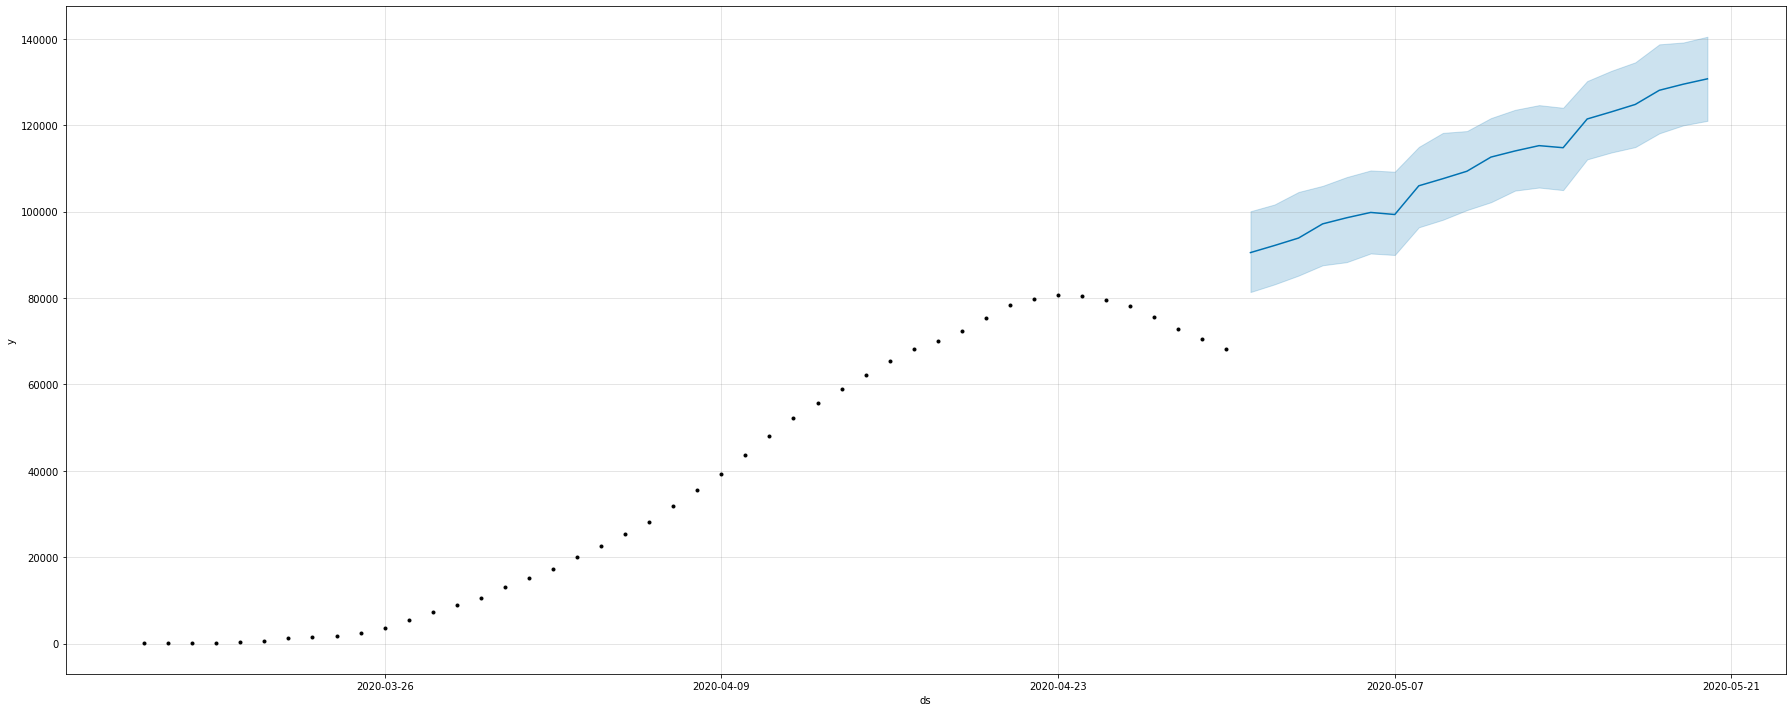

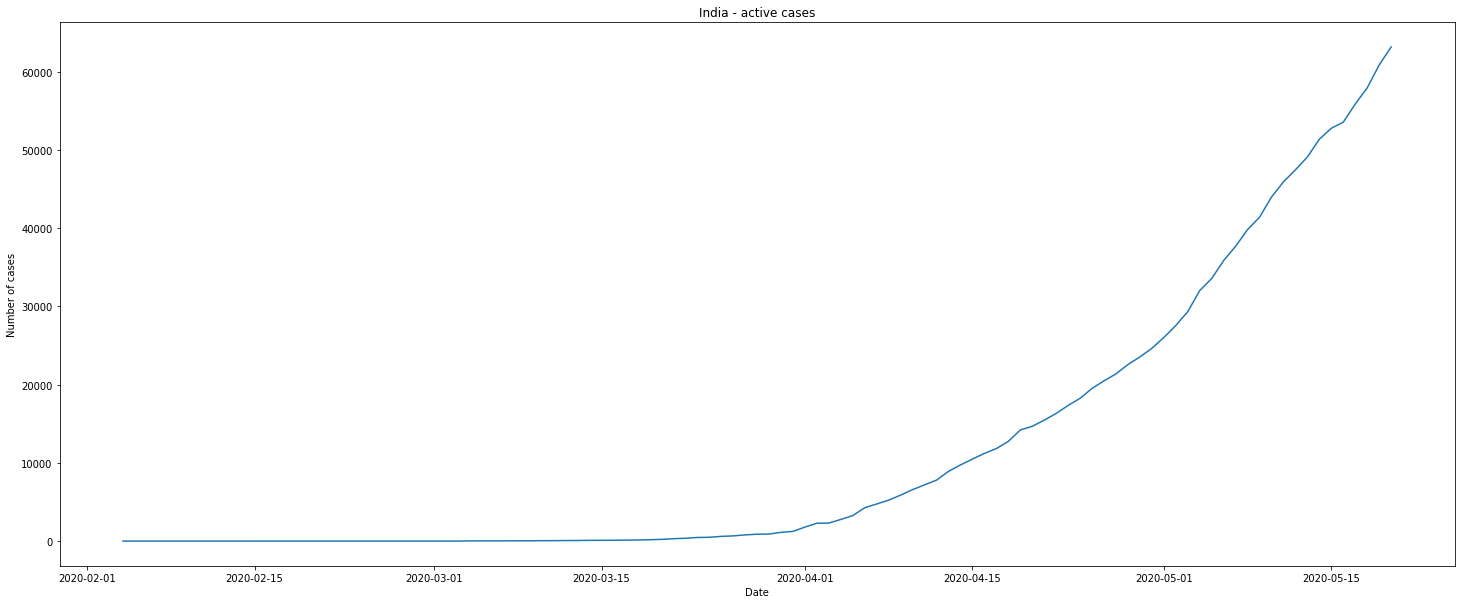

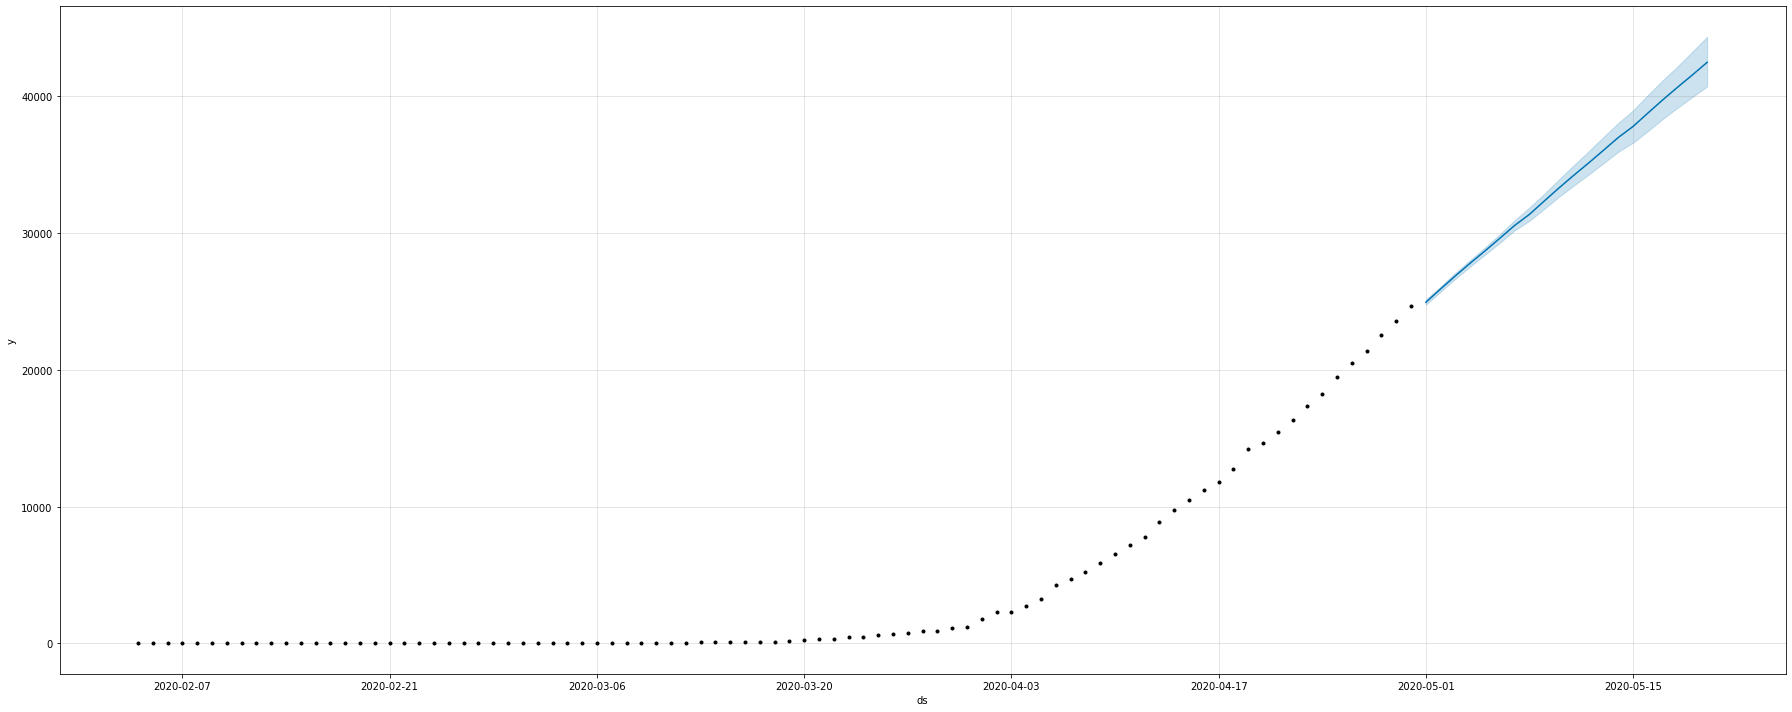

In [225]:
countries = {"Germany": "de", "Spain": "es", "France": "fr", "India": "in", "Italy": "it", "Russia": "ru", "Turkey": "tr", "United States": "us"}
country_list = list(countries.keys())
country_iso_code_list = list(countries.values())
data_type_list = ["confirmed_cases", "recovered_cases", "death_cases", "active_cases"]

# US
us_start_date = "2020-01-27"
results_active_cases = fbprophet_forecasting(country_list[7], country_iso_code_list[7], data_type_list[3], us_start_date, "2020-05-20", "2020-05-01", results_active_cases)

# ES
es_start_date = "2020-02-06"
results_active_cases = fbprophet_forecasting(country_list[1], country_iso_code_list[1], data_type_list[3], es_start_date, "2020-05-20", "2020-05-01", results_active_cases)

# IT
it_start_date = "2020-02-05"
results_active_cases = fbprophet_forecasting(country_list[4], country_iso_code_list[4], data_type_list[3], it_start_date, "2020-05-20", "2020-05-01", results_active_cases)

# FR
fr_start_date = "2020-01-29"
results_active_cases = fbprophet_forecasting(country_list[2], country_iso_code_list[2], data_type_list[3], fr_start_date, "2020-05-20", "2020-05-01", results_active_cases)

# DE
de_start_date = "2020-02-01"
results_active_cases = fbprophet_forecasting(country_list[0], country_iso_code_list[0], data_type_list[3], de_start_date, "2020-05-20", "2020-05-01", results_active_cases)

# RU
ru_start_date = "2020-02-05"
results_active_cases = fbprophet_forecasting(country_list[5], country_iso_code_list[5], data_type_list[3], ru_start_date, "2020-05-20", "2020-05-01", results_active_cases)

# TR
tr_start_date = "2020-03-16"
results_active_cases = fbprophet_forecasting(country_list[6], country_iso_code_list[6], data_type_list[3], tr_start_date, "2020-05-20", "2020-05-01", results_active_cases)

# IN
in_start_date = "2020-02-04"
results_active_cases = fbprophet_forecasting(country_list[3], country_iso_code_list[3], data_type_list[3], in_start_date, "2020-05-20", "2020-05-01", results_active_cases)

In [226]:
results_active_cases

,Country,Model,MAE,RMSE,RRSE,MAPE
0,United States,Facebook Prophet,77545.730075,86056.606298,0.0,7.295754
1,Spain,Facebook Prophet,63011.994173,65392.524519,0.0,103.396121
2,Italy,Facebook Prophet,23532.637808,26763.762284,0.0,31.431355
3,France,Facebook Prophet,24957.743685,28288.007689,0.0,26.920209
4,Germany,Facebook Prophet,42594.059488,43528.249081,0.0,277.556364
5,Russia,Facebook Prophet,33491.817293,35995.811039,0.0,18.711431
6,Turkey,Facebook Prophet,65993.849142,69610.319107,0.0,165.132792
7,India,Facebook Prophet,10512.712096,11984.974584,0.0,21.7282


In [227]:
results_active_cases.to_csv('/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/data/performance_results_active_cases_fbprophet.csv', index=False)